# Titanic train project

# Problem Statement:


The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# Importing required library

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's find out the missing values and fill them with appropriate values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here,We can see 3 columns have null/NaN values in the dataset of which 70% of cabin entries are missing and around 20% data entries of age are missing.

# Let's Find missing values

In [11]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Let's  represent null/NaN values using seaborn plotting techniques

Representing using heatmap()

<AxesSubplot:>

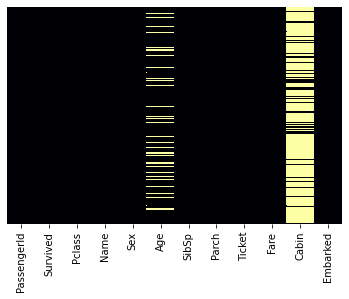

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='inferno')

Looking at the heatmap we can conclude that majority of the cabin values and some  of the age values are missing

# How many Male & female travelled ?
Let's check it now.

No. of males in the titanic: 577
No. of females in the titanic: 314


<AxesSubplot:xlabel='Sex', ylabel='count'>

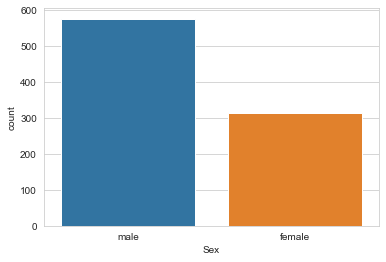

In [32]:
print("No. of males in the titanic:",df['Sex'].value_counts()['male'])
print("No. of females in the titanic:",df['Sex'].value_counts()['female'])
sns.set_style('whitegrid')
sns.countplot('Sex',data=df)

# How many travellers survived ?

<AxesSubplot:xlabel='Survived', ylabel='count'>

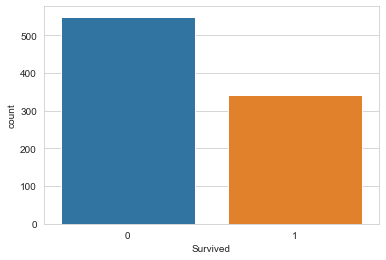

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

From this analysis we can clearly see that more number of peoples were not able to survive.
Now, We will see how many Male/Female were able to survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

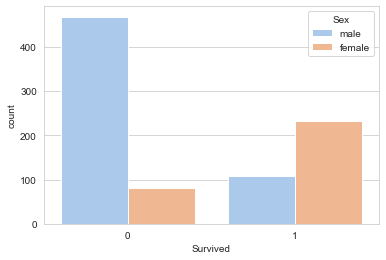

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='pastel')

From this analysis we can clearly see that large number of women survived as compared to men. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

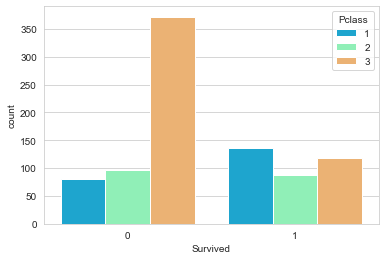

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

From this analysis we can see that Large number of travellers who were in Passesnger class 3 were not able to survive and from Passenger class 1 large number of travellers were survived

<AxesSubplot:>

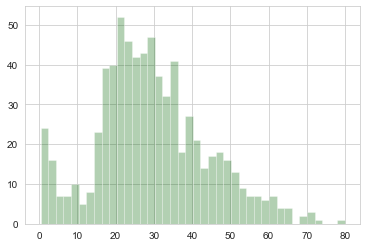

In [50]:
df['Age'].hist(bins=40,color='darkgreen',alpha=0.3)

From this analysis we can see that large number of travellers age were between 20-30

<AxesSubplot:xlabel='SibSp', ylabel='count'>

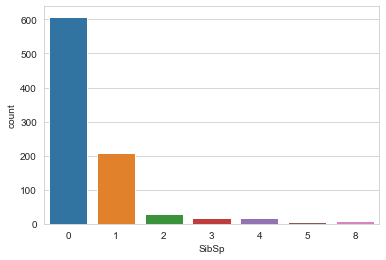

In [51]:
sns.countplot(x='SibSp',data=df)

From this analysis  we can see that Large number of travellers were without any siblings or spouse.

<AxesSubplot:>

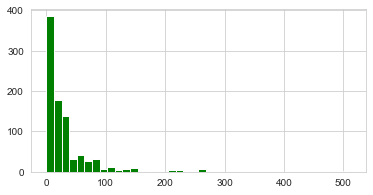

In [55]:
df['Fare'].hist(color="green",bins=40,figsize=(6,3))

From this analysis we can see the average fare paid by travellers

# Data Cleaning

We have 2 columns where NAN value is there. We have to fill  those NAN values.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

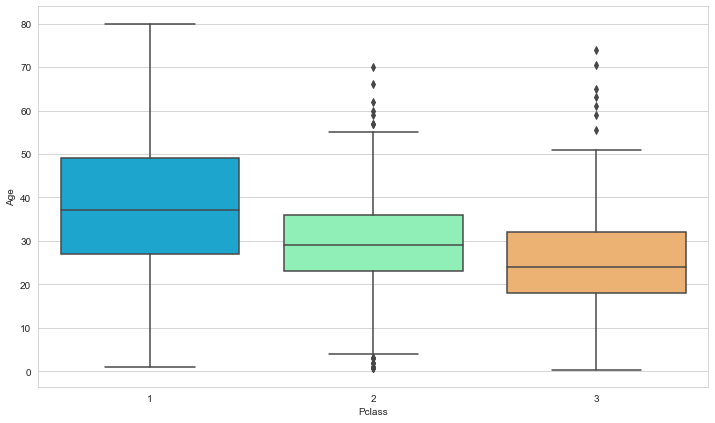

In [57]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

In [59]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
            return Age

In [60]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

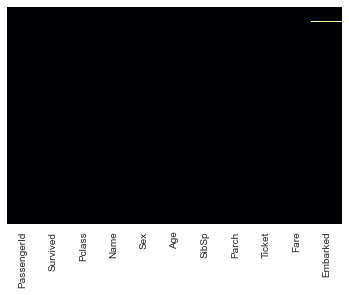

In [65]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [66]:
df['Embarked'].fillna('bfill',inplace=True)

In [67]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

So we now resolved all the missing values in the dataset

# Converting Categorical Features

We have to  convert categorical features to dummy variables using pandas else our ML algorithm won't be able to directly take in those features in inputs

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [69]:
pd.get_dummies(df["Embarked"],drop_first=True).head()

,Q,S,bfill
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [70]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [71]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [72]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [73]:
df=pd.concat([df,sex,embark],axis=1)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,bfill
0,1,0,3,22.0,1,0,7.2500,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0


Our data is ready for our model

# Building a Logistic Regression model

Let's split our data into a training set and test set

# Train Test Split

In [75]:
df.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,bfill
0,1,3,22.0,1,0,7.2500,1,0,1,0
1,2,1,38.0,1,0,71.2833,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,0
4,5,3,35.0,0,0,8.0500,1,0,1,0


In [76]:
df["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_df,X_test,y_df,y_test=train_test_split(df.drop("Survived",axis=1),
                                     df["Survived"],test_size=0.30,
                                     random_state=101)


# Training and Predicting

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logmodel=LogisticRegression()
logmodel.fit(X_df,y_df)

LogisticRegression()

In [99]:
predictions=logmodel.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
accuracy=confusion_matrix(y_test,predictions)

In [102]:
accuracy

array([[134,  20],
       [ 40,  74]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7761194029850746

In [105]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Save the model

In [112]:
import joblib
joblib.dump(logmodel,'titanictrainproject.pkl')

['titanictrainproject.pkl']